# PointCloud-to-Hypergraph Mixture of Gaussians + Minimal Spanning Tree

This approach creates a hypergraph from a point cloud by fitting a mixture of Gaussians to the points in a point cloud and then constructing a minimal spanning tree between the means of the fitted Gaussians. The hypergraph we obtain represents two things; Firstly, it groups points with similar coordinates together. Secondly, it creates discrete dependencies between neighbouring groups of points.

We provide several ways to set the number of components (Gaussians) fitted. By providing the minimal and maximal number of components, our approach selects the number of components with the lowest Akaike information criterion from the range $[\text{minimal number of components}, \text{maximal number of components}]$. If only one of these parameters is provided, the number of components is equal to this number. Finally, if no parameter is provided, we select the number of components with the lowest Akaike information criterion from the set $\{2^i, 1\leq i \leq \lfloor log_2(N/2) \rfloor\}$, where $N$ is the number of points in the pointcloud.

This notebook shows how to import a dataset, with the desired lifting, and how to run a neural network using the loaded data.

In [1]:
%load_ext autoreload
%autoreload 2
from modules.data.preprocess.preprocessor import PreProcessor
from modules.data.load.loaders import PointCloudLoader
from modules.utils.utils import (
    describe_data,
    load_dataset_config,
    load_model_config,
    load_transform_config,
)

For testing purposes, we implemented a pointcloud loader that loads points sampled from a random geometric shape (contained in pytorch geometric data set GeometricShapes) by default.

In [15]:
loader = PointCloudLoader(
    {
        "data_dir": "modules/transforms/liftings/pointcloud2hypergraph/",
    }
)

dataset = loader.load()

By default, the lifting chooses the number of components from the range between 2 and 10.

In [3]:
transform_type = "liftings"
# If the transform is a topological lifting, it should include both the type of the lifting and the identifier
transform_id = "pointcloud2hypergraph/mogmst_lifting"

# Read yaml file
transform_config = {"lifting": load_transform_config(transform_type, transform_id)}


Transform configuration for pointcloud2hypergraph/mogmst_lifting:

{'transform_type': 'lifting',
 'transform_name': 'MoGMSTLifting',
 'min_components': None,
 'max_components': None,
 'random_state': None}


Processing...



Dataset only contains 1 sample:


Done!


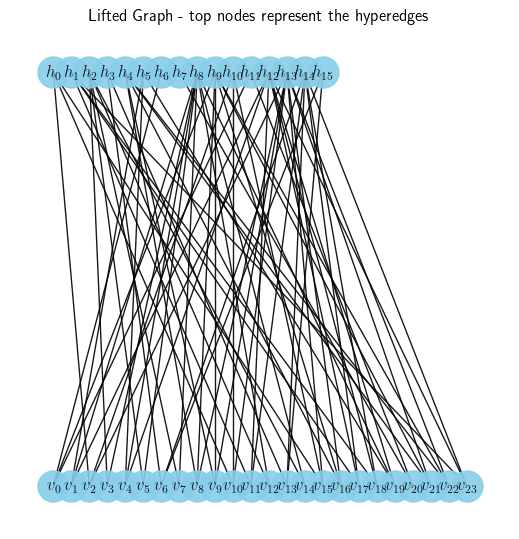

 - Hypergraph with 24 vertices and 16 hyperedges.
 - The nodes have feature dimensions 1.
 - The hyperedges have feature dimensions 1.



In [18]:
lifted_dataset = PreProcessor(dataset, transform_config, loader.data_dir)
describe_data(lifted_dataset)

In [7]:
from modules.models.hypergraph.unigcn import UniGCNModel

dataset_name = "geo_shapes"
dataset_config = load_dataset_config(dataset_name)

model_type = "hypergraph"
model_id = "unigcn"
model_config = load_model_config(model_type, model_id)

model = UniGCNModel(model_config, dataset_config=dataset_config)


Dataset configuration for geo_shapes:

{'data_domain': 'pointcloud',
 'data_type': 'toy_dataset',
 'data_name': 'geo_shapes',
 'data_dir': 'datasets/pointcloud/toy_dataset',
 'dim': 1,
 'num_classes': 2,
 'num_samples': 24,
 'num_features': 1,
 'task': 'classification',
 'loss_type': 'cross_entropy'}

Model configuration for hypergraph UNIGCN:

{'in_channels': None,
 'hidden_channels': 32,
 'out_channels': None,
 'n_layers': 2}


In [8]:
y_hat = model(lifted_dataset.get(0))